In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [1]:
%matplotlib widget
import wecs_pmsm

In [2]:
model = wecs_pmsm.model()
model.Dt = 0.01
params = {}
params.update({'nu_w_1':10,'T_beta_1':1.0,'K_tr_1':1.0,'D_tr_1':0.8,'K_pdc_1':10})
model.ini(params,'xy_1.json')
model.report_x()
#model.report_params()

delta_2 = -0.00
Domega_2 = -0.00
Dv_2  =  0.00
p_w_mppt_lpf_1 =  0.56
xi_beta_1 =  0.00
beta_1 =  0.00
theta_tr_1 =  0.56
omega_t_1 =  1.12
omega_r_1 =  1.12
v_dc_1 =  1.20
xi_freq =  0.00


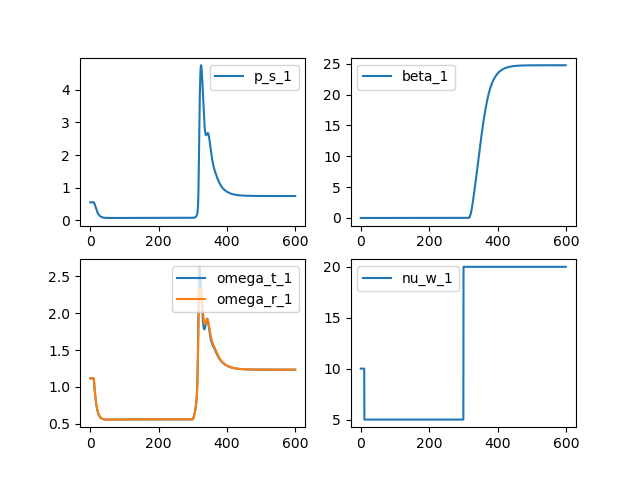

In [5]:
model = wecs_pmsm.model()
model.Dt = 0.05
params = {}
params.update({'nu_w_1':10,'K_tr_1':2.0,'D_tr_1':1,
               'T_beta_1':21.0,'K_p_beta_1':1,'K_i_beta_1':1,'Omega_r_max_1':1.4,
               'K_pdc_1':2, 'K_pow_1':1.0})
model.ini(params,'xy_1.json')
model.run(10,{})
model.run(300,{'nu_w_1':5})
model.run(600,{'nu_w_1':20})
model.post();

fig,axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].plot(model.Time,model.get_values('p_s_1'), label='p_s_1')
axes[1,0].plot(model.Time,model.get_values('omega_t_1'), label='omega_t_1')
axes[1,0].plot(model.Time,model.get_values('omega_r_1'), label='omega_r_1')

axes[0,1].plot(model.Time,model.get_values('beta_1'), label='beta_1')
axes[1,1].plot(model.Time,model.get_values('nu_w_1'), label='nu_w_1')

for ax in axes.flatten(): ax.legend()

In [61]:
Nu_w = np.linspace(2.0,20,40)
P_s = Nu_w.copy() 
Beta = Nu_w.copy()
Omega_t = Nu_w.copy()
Theta_tr = Nu_w.copy()
for it,nu_w in enumerate(Nu_w):
    Omega_r_max = 1.36
    omega_0 = np.clip(nu_w/10,0.4,Omega_r_max)
    beta_0 = np.clip((nu_w-13)*3,0,90)
    xy_0 = {
        "V_1": 1.0,"theta_1": 0.0,"V_2": 1.0,"theta_2": 0.0,
        "omega_coi": 1.0,"omega_2": 1.0,
        "theta_tr_1": 0.0,
        "omega_t_1": omega_0,"omega_r_1": omega_0,
        "xi_beta_1":beta_0,
        "beta_1":beta_0,
        "i_sr_1": 1,
        "v_dc_1": 1.5,
        "p_w_mppt_lpf_1":omega_0,
        "v_mq_1":1.0,
        "v_tq_ref_1":1.0
    }


    model.ini({'K_pdc_1':50,"C_dc_1":0.01,"nu_w_1":nu_w,'q_s_ref_1':0.0,
            "K_p_beta_1":1,"K_i_beta_1":1.0,"T_beta_1":1.2,"Omega_r_max_1":Omega_r_max,
            "beta_ext_1":0,"p_ref_ext_1":0},xy_0)#'xy_0.json')

    P_s[it]  = model.get_value('p_s_1')
    Beta[it] = model.get_value('beta_1')
    Omega_t[it] = model.get_value('omega_t_1')
    Theta_tr[it] = model.get_value('theta_tr_1')


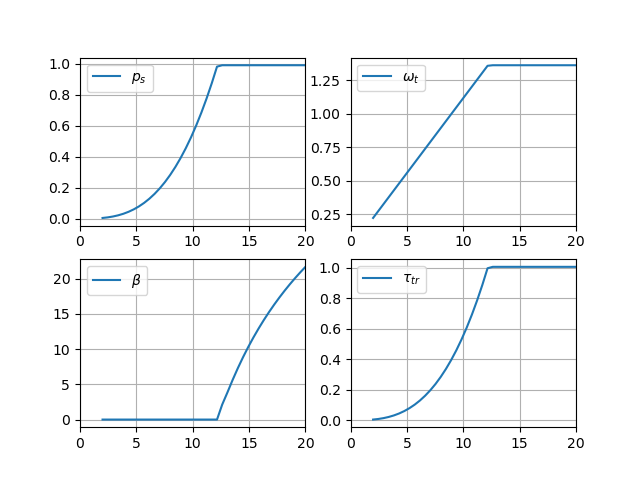

In [66]:
fig,axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].plot(Nu_w,P_s,label='$p_s$')
axes[1,0].plot(Nu_w,Beta,label=r'$\beta$')
axes[0,1].plot(Nu_w,Omega_t,label='$\omega_t$')
axes[1,1].plot(Nu_w,Theta_tr* model.get_value('K_tr_1'),label=r'$\tau_{tr}$')

for ax in axes.flatten(): 
    ax.grid()
    ax.set_xlim((0,20))
    ax.legend()


In [45]:
model.report_params()

S_base =100000000.00
g_1_2 = 3.85
b_1_2 =-19.23
bs_1_2 =-0.00
U_1_n =20000.00
U_2_n =20000.00
S_n_2 =1000000000.00
F_n_2 =50.00
X_v_2 = 0.00
R_v_2 = 0.00
K_delta_2 = 0.00
K_alpha_2 = 0.00
K_rocov_2 = 0.00
S_n_1 =1000000.00
K_mppt3_1 = 0.40
Omega_r_max_1 = 1.38
T_beta_1 = 1.20
K_p_beta_1 = 1.00
K_i_beta_1 = 1.00
H_t_1 = 4.00
H_r_1 = 1.00
K_tr_1 = 2.00
D_tr_1 = 1.00
R_m_1 = 0.01
L_m_1 = 0.05
Phi_m_1 = 1.00
K_pdc_1 =50.00
R_s_1 = 0.01
X_s_1 = 0.05
C_dc_1 = 0.01
A_l_1 = 0.01
B_l_1 = 0.01
C_l_1 = 0.01
C_1_1 = 0.52
C_2_1 =116.00
C_3_1 = 0.40
C_4_1 = 5.00
C_5_1 =21.00
C_6_1 = 0.01
Nu_w_b_1 =12.00
Lam_b_1 = 8.10
Omega_t_b_1 = 1.20
K_pow_1 = 1.00
C_p_b_1 = 0.48
T_mppt_1 = 5.00
K_p_agc = 0.00
K_i_agc = 0.00
K_xif = 0.01


In [32]:
axes.flatten()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)